#### **AN8005 MACHINE LEARNING METHODOLOGY** <br/>
**Group:** 10 <br/>
**Team Members:** Daniel Low, Ong Pei Yu, Chan Han Wen, Yang Hang

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
diabetes = pd.read_csv("D:/0Course/Trimester 3/AN8005-MACHINE LEARNING METHODOLOGY/group assignment/New/Diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Data Vizualization and Descriptive Statistics**

In [3]:
# Descriptive Statistics
print(diabetes.isnull().sum())
print(f"Number of duplicated rows is {diabetes.duplicated().sum()}")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Number of duplicated rows is 0


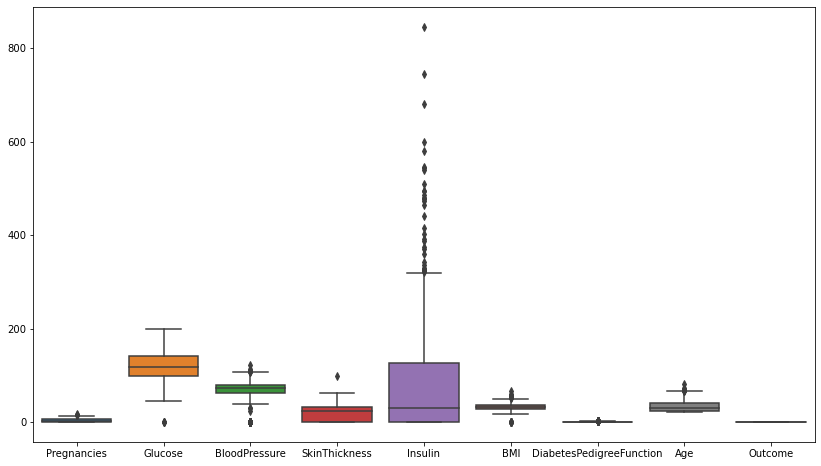

We can see that insulin has a lot of outliers.


In [4]:
# boxplot for all the variables
plt.figure(figsize=(14, 8))
sns.boxplot(data=diabetes)
plt.show()
print(f"We can see that insulin has a lot of outliers.")

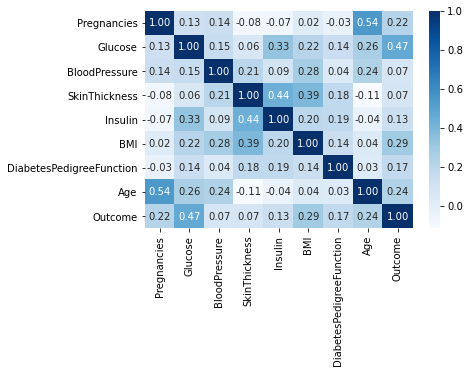

In [5]:
# correlation value of explanatory variable with class variable
corr = diabetes.corr()
# correlation graph for all explanatory variables - no high correlation
sns.heatmap(diabetes.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.show()
#


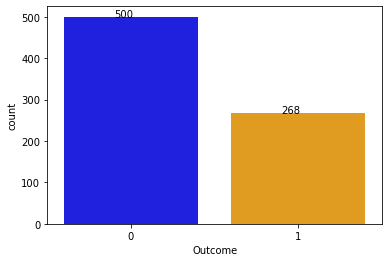

Overall Proportion of diabetes positive to total dataset is 0.35%. 
While overall proportion is not 50-50, it is also not really considered a imbalanced dataset.


In [6]:
# Checking for imbalance dataset count of target variable class - 0 vs 1
ax = sns.countplot(x="Outcome", data=diabetes, palette=["blue", "orange"])
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()),
               (p.get_x()+0.3, p.get_height()+0.1))
plt.show()
prop_class = diabetes.loc[diabetes["Outcome"] == 1, "Outcome"].count()/diabetes["Outcome"].count()
print(f"""Overall Proportion of diabetes positive to total dataset is {prop_class:.2f}%. 
While overall proportion is not 50-50, it is also not really considered a imbalanced dataset.""")


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable

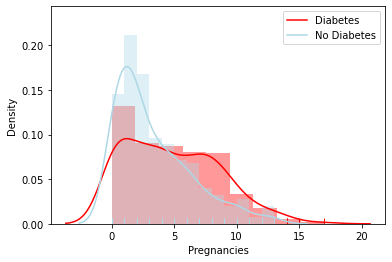

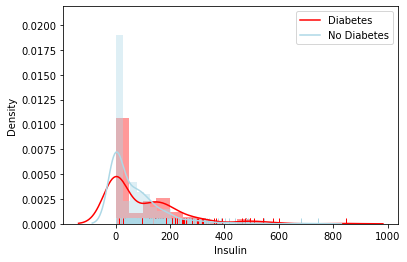

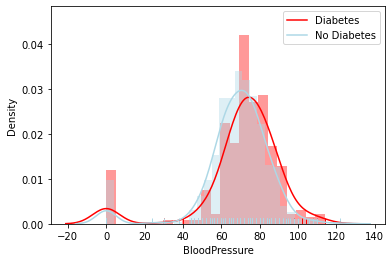

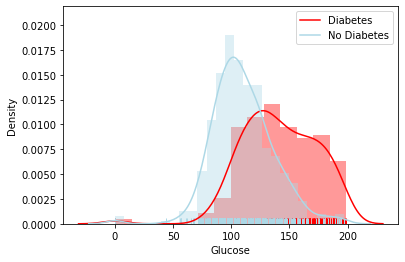

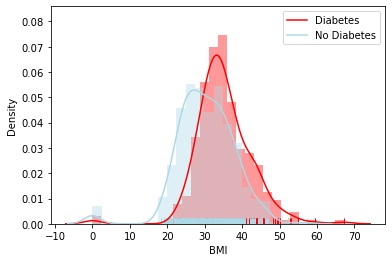

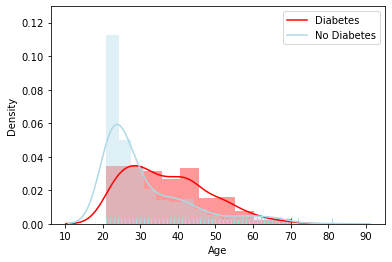

In [7]:
# density / histogram plot for diabetic vs non-diabetic group
def distplot(col_name):
    """
    A function that will plot the distribution of column 'col_name' for diabetic and non-diabetic people separately
    """
    plt.figure()
    sns.distplot(diabetes[col_name][diabetes.Outcome == 1], color ="red", rug = True)
    sns.distplot(diabetes[col_name][diabetes.Outcome == 0], color ="lightblue",rug = True)
    plt.legend(['Diabetes', 'No Diabetes'])
    
distplot('Pregnancies')
distplot('Insulin')
distplot('BloodPressure')
distplot('Glucose')
distplot('BMI')
distplot('Age')

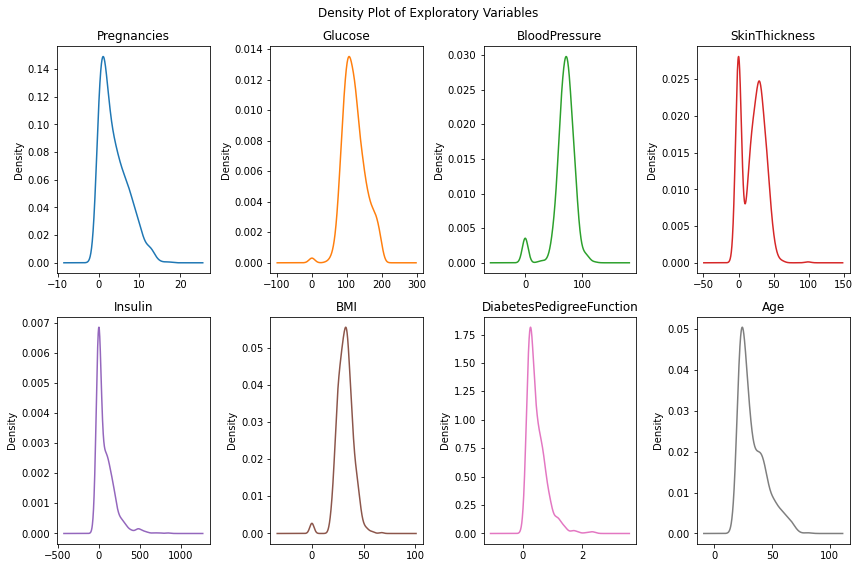

In [8]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# combined density plot for all x-variables
fig, axes = plt.subplots(2, 4, figsize=(12,8))
axes = axes.flatten()
ax_idx = 0
columns = diabetes.drop('Outcome', axis = 1).columns
for col in columns:
    diabetes[col].plot(kind = 'density', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.suptitle('Density Plot of Exploratory Variables')
plt.tight_layout()
plt.show()


#### **Split Data in Training and Testing Set**

In [9]:
# Split data into train and holdout set
X = diabetes.drop(columns=["Outcome"])
Y = diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=101, test_size=0.3)

#### **Feature Engineering**

In [10]:
# Change current X values to np.nan
X = X.replace(0, np.nan)

In [11]:
# Identifying numeric columns for pre-processing
numeric_col = list(X.select_dtypes('number'))
# Create preprocessing step to both Impute and Scale in Series
numeric_trans = Pipeline([("Impute", SimpleImputer(missing_values=np.nan, strategy="median")),
                        ("Scale", MinMaxScaler(), )])

In [12]:
# Create column transformer object with preprocessing workflow for use on later pipeline
CT = ColumnTransformer([("numeric trans", numeric_trans, numeric_col)],
                        remainder="passthrough")


In [13]:
# Fit and transform X_train data
X_trans_train = CT.fit_transform(X_train)
X_trans_train = pd.DataFrame(X_trans_train, columns=X.columns)
# Only apply the prefitted values to X_test col
X_trans_test = CT.transform(X_test)
X_trans_test = pd.DataFrame(X_trans_test, columns=X.columns)

In [14]:
### For testing purpose to show that median for train set and test set is fitted on train
print(X_trans_train.median() == X_trans_test.median())
# 
print(X_trans_train.shape)
print(y_train.shape)

Pregnancies                  True
Glucose                     False
BloodPressure               False
SkinThickness                True
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
dtype: bool
(537, 8)
(537,)


#### **K-Nearest Neighbor Classifiers** - Ong Pei Yu

In [15]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN classifier with n_neighbors=5 and metric=Euclidean**

In [16]:
# initialize the model with 5 neighbors to use
knn_model = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_model.fit(X_trans_train, y_train)

# to make predictions on test data
y_pred = knn_model.predict(X_trans_test)
print(classification_report(y_test, y_pred))
print(f"The accuracy score is: {accuracy_score(y_test, y_pred) * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       150
           1       0.67      0.57      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231

The accuracy score is: 74.89%


**Choosing the K-value to use**

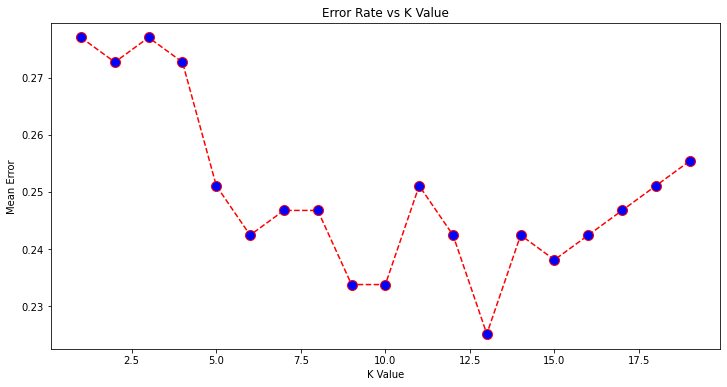

In [17]:
# calculating error for K values between 1 and 20
error = []
test_scores = []
train_scores = []

for i in range(1,20):
    knn_e = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn_e.fit(X_trans_train, y_train)
    pred_i = knn_e.predict(X_trans_test)
    error.append(1-accuracy_score(pred_i, y_test))
    train_scores.append(knn_e.score(X_trans_train, y_train))
    test_scores.append(knn_e.score(X_trans_test, y_test))


# to plot error values against K values
plt.figure(figsize=(12,6))
plt.plot(range(1,20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [18]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [19]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.48917748917748 % and k = [13]


**Re-train KNN model with new K-value and metric=Euclidean**

In [20]:
# using n_neighbors=13 as the new K-value
knn_e = KNeighborsClassifier(n_neighbors=13, metric="euclidean")
knn_e.fit(X_trans_train, y_train)

# to make predictions on test data
y_pred = knn_e.predict(X_trans_test)
print(classification_report(y_test, y_pred))
print(f"The accuracy score is: {accuracy_score(y_test, y_pred) * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       150
           1       0.70      0.62      0.66        81

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

The accuracy score is: 77.49%


**Choosing the K-value on KNN classifier, using metric=Manhattan**

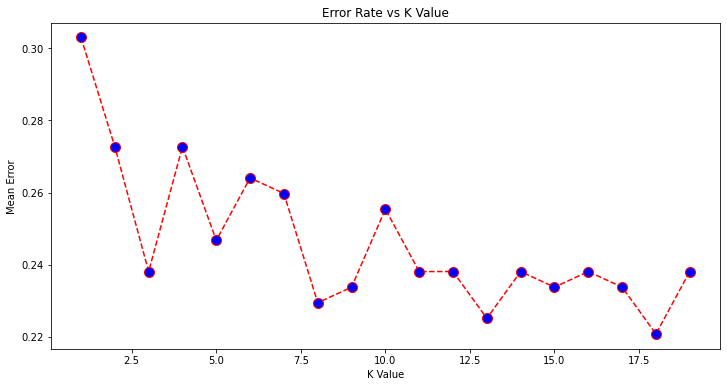

In [21]:
# calculating error for K values between 1 and 20
error = []
test_scores = []
train_scores = []

for i in range(1,20):
    knn_man = KNeighborsClassifier(n_neighbors=i, metric="manhattan")
    knn_man.fit(X_trans_train, y_train)
    pred_i = knn_man.predict(X_trans_test)
    error.append(1-accuracy_score(pred_i, y_test))
    train_scores.append(knn_man.score(X_trans_train, y_train))
    test_scores.append(knn_man.score(X_trans_test, y_test))


# to plot error values against K values
plt.figure(figsize=(12,6))
plt.plot(range(1,20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [22]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [23]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.92207792207793 % and k = [18]


**Re-train KNN model with new K-value and metric=Manhattan**

In [24]:
# using n_neighbors=18 as the new K-value
knn_man = KNeighborsClassifier(n_neighbors=18, metric="manhattan")
knn_man.fit(X_trans_train, y_train)

# to make predictions on test data
y_pred = knn_man.predict(X_trans_test)
print(classification_report(y_test, y_pred))
print(f"The accuracy score is: {accuracy_score(y_test, y_pred) * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       150
           1       0.78      0.52      0.62        81

    accuracy                           0.78       231
   macro avg       0.78      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231

The accuracy score is: 77.92%


**Hyper Parameter Optimization - using GridSearch**

In [25]:
# Gridsearch tuning
knn_grid = KNeighborsClassifier()
k_values = range(1, 20)
param_grid = {"n_neighbors": k_values, "metric": ['manhattan','euclidean']}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv= 10, scoring = "accuracy")
knn_grid_model.fit(X_trans_train, y_train)
knn_grid_model.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

**Optimal Model based on GridSearch**

In [26]:
# printing the most optimal model and associated parameters
knn_best = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
knn_best.fit(X_trans_train, y_train)

# to make predictions on test data
y_pred = knn_best.predict(X_trans_test)
print(classification_report(y_test, y_pred))
print(f"The accuracy score is: {accuracy_score(y_test, y_pred) * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       150
           1       0.71      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231

The accuracy score is: 76.62%


#### **Decision Trees** - Daniel Low

In [27]:
from sklearn.tree import DecisionTreeClassifier


**Decision Trees** (Limited by Max Depth)

In [28]:
maxdepth = [x for x in range(4,25,2)]
md_err_train = list()
md_err_test = list()

for depth in maxdepth:
    DT_d = DecisionTreeClassifier(max_depth=depth, random_state=101)
    DT_d.fit(X_trans_train, y_train)
    pred_train = DT_d.predict(X_trans_train)
    pred_test = DT_d.predict(X_trans_test)
    acc_train = accuracy_score(pred_train, y_train)
    acc_test = accuracy_score(pred_test, y_test)
    md_err_train.append(1-acc_train)
    md_err_test.append(1-acc_test)

md_err = zip(maxdepth, md_err_train, md_err_test)
print("**Testing for Max Depth**")
for each in md_err:
    print(f"The Decision tree of max depth {each[0]} gave a train set error of {float(each[1])*100:.2f}% and a test set error of {float(each[2])*100:.2f}%")


**Testing for Max Depth**
The Decision tree of max depth 4 gave a train set error of 19.55% and a test set error of 29.00%
The Decision tree of max depth 6 gave a train set error of 13.97% and a test set error of 29.44%
The Decision tree of max depth 8 gave a train set error of 9.68% and a test set error of 27.27%
The Decision tree of max depth 10 gave a train set error of 5.96% and a test set error of 26.84%
The Decision tree of max depth 12 gave a train set error of 2.42% and a test set error of 27.71%
The Decision tree of max depth 14 gave a train set error of 0.74% and a test set error of 30.30%
The Decision tree of max depth 16 gave a train set error of 0.00% and a test set error of 29.87%
The Decision tree of max depth 18 gave a train set error of 0.00% and a test set error of 29.87%
The Decision tree of max depth 20 gave a train set error of 0.00% and a test set error of 29.87%
The Decision tree of max depth 22 gave a train set error of 0.00% and a test set error of 29.87%
The D

,maxdepth,train_error,test_error
0,4,0.195531,0.290043
1,6,0.139665,0.294372
2,8,0.096834,0.272727
3,10,0.059590,0.268398
4,12,0.024209,0.277056
5,14,0.007449,0.303030
6,16,0.000000,0.298701
7,18,0.000000,0.298701
8,20,0.000000,0.298701
9,22,0.000000,0.298701


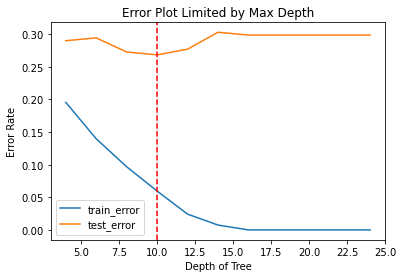

In [29]:
# Print Plot for Max depth
maxdepth_df = pd.DataFrame(index=maxdepth, data = {'train_error':md_err_train, 'test_error':md_err_test})
lowest = maxdepth_df[["test_error"]].idxmin().tolist()
maxdepth_df.plot(title="Error Plot Limited by Max Depth")
plt.axvline(x=lowest, linestyle='--', color='r')
plt.xlabel("Depth of Tree")
plt.ylabel("Error Rate")

# Print Dataframe
maxdepth_df.reset_index(inplace=True)
maxdepth_df.rename(columns={"index":"maxdepth"}, inplace=True)
maxdepth_df

**Decision Trees** (Limited by Number of rows in both nodes and leaf)

In [30]:
min_ss = [x for x in range(10,2,-1)]
depth_ss = list()
ln_err_train = list()
ln_err_test = list()

for split in min_ss:
    DT_s = DecisionTreeClassifier(min_samples_split=split, min_samples_leaf=split, random_state=101)
    DT_s.fit(X_trans_train, y_train)
    pred_train = DT_s.predict(X_trans_train)
    pred_test = DT_s.predict(X_trans_test)
    acc_train = accuracy_score(pred_train, y_train)
    acc_test = accuracy_score(pred_test, y_test)
    ln_err_train.append(1-acc_train)
    ln_err_test.append(1-acc_test)
    depth_ss.append(DT_s.tree_.max_depth)

ln_err = zip(min_ss, ln_err_train, ln_err_test, depth_ss)
for each in ln_err:
    print(f"The Decision Tree limited to sample split of {each[0]} gave a train set error of {float(each[1])*100:.2f}% and a test set error of {float(each[2])*100:.2f}%")

The Decision Tree limited to sample split of 10 gave a train set error of 15.83% and a test set error of 27.71%
The Decision Tree limited to sample split of 9 gave a train set error of 15.46% and a test set error of 26.41%
The Decision Tree limited to sample split of 8 gave a train set error of 14.53% and a test set error of 25.54%
The Decision Tree limited to sample split of 7 gave a train set error of 13.04% and a test set error of 28.14%
The Decision Tree limited to sample split of 6 gave a train set error of 12.66% and a test set error of 27.71%
The Decision Tree limited to sample split of 5 gave a train set error of 11.92% and a test set error of 27.71%
The Decision Tree limited to sample split of 4 gave a train set error of 9.31% and a test set error of 27.27%
The Decision Tree limited to sample split of 3 gave a train set error of 6.33% and a test set error of 29.87%


,min_sample,train_error,test_error,depth
0,10,0.158287,0.277056,11
1,9,0.154562,0.264069,12
2,8,0.145251,0.255411,12
3,7,0.130354,0.281385,13
4,6,0.126629,0.277056,13
5,5,0.119181,0.277056,13
6,4,0.093110,0.272727,14
7,3,0.063315,0.298701,15


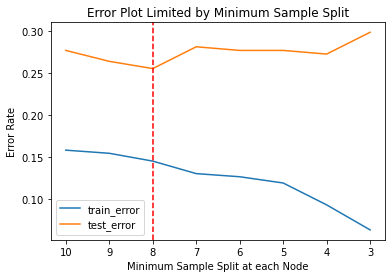

In [31]:
# Print Plot
minss_df = pd.DataFrame(index=min_ss, data = {'train_error':ln_err_train, 'test_error':ln_err_test})
minss_df.plot(title="Error Plot Limited by Minimum Sample Split").invert_xaxis()
lowest = minss_df[["test_error"]].idxmin().tolist()
plt.axvline(x=lowest, linestyle='--', color='r')
plt.xlabel("Minimum Sample Split at each Node")
plt.ylabel("Error Rate")

# Print Dataframe
minss_df = pd.DataFrame(index=min_ss, data = {'train_error':ln_err_train, 'test_error':ln_err_test, 'depth':depth_ss})
minss_df.reset_index(inplace=True)
minss_df.rename(columns={"index":"min_sample"}, inplace=True)
minss_df

**Decision Trees** (Post Pruning)

In [32]:
DT = DecisionTreeClassifier(random_state=101)
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

The CCP value that can provide the best fit is 0.004190 which has an accuracy of 75.32%


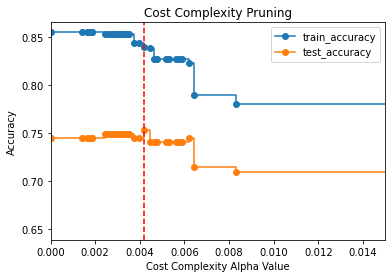

In [33]:
models = list()
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(min_samples_split=8, min_samples_leaf=8 ,random_state=101, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)

train_acc = [model.score(X_train, y_train) for model in models]
test_acc = [model.score(X_test, y_test) for model in models]

minalpha_df = pd.DataFrame(index=ccp_alphas, data = {'train_accuracy':train_acc, 'test_accuracy':test_acc})
minalpha_df.plot(title = "Cost Complexity Pruning", marker="o", drawstyle="steps-post")
highest = minalpha_df[["test_accuracy"]].idxmax().tolist()
max_acc = minalpha_df["test_accuracy"].max()
plt.axvline(x=highest, linestyle='--', color='r')
plt.xlabel("Cost Complexity Alpha Value")
plt.xlim(0, 0.015)
plt.ylabel("Accuracy")

print(f"The CCP value that can provide the best fit is {highest[0]:4f} which has an accuracy of {max_acc*100:.2f}%")

In [34]:
DT_pruned = DecisionTreeClassifier(min_samples_split=8, min_samples_leaf=8 ,random_state=101, ccp_alpha=highest[0])
DT_pruned.fit(X_trans_train, y_train)
DT_pruned_pred_train = DT_pruned.predict(X_trans_train)
DT_pruned_pred_test = DT_pruned.predict(X_trans_test)
DT_pruned_acc_train = accuracy_score(DT_pruned_pred_train, y_train)
DT_pruned_acc_test = accuracy_score(DT_pruned_pred_test, y_test)
DT_pruned_train_err = 1-DT_pruned_acc_train
DT_pruned_test_err = 1-DT_pruned_acc_test

# Assertion that the leaf and nodes are limited to the same number of rows
if DT_pruned.get_params().get('min_samples_leaf') == DT_pruned.get_params().get('min_samples_split'):
    print(f"The Pruned DT has a depth of {DT_pruned.tree_.max_depth} a leaf and sample split of {DT_pruned.get_params().get('min_samples_split')} and a accuracy of {DT_pruned_acc_test*100:.2f}%")

The Pruned DT has a depth of 10 a leaf and sample split of 8 and a accuracy of 75.32%


**Decision Tree** (GridSearchCV)

In [35]:
# Creating ML Pipeline for testing Decision Trees
dt_pipeline = Pipeline(steps=[("col_trans", CT), ("model", DecisionTreeClassifier(random_state=101))])
# Creating Testing parameters for model
leafnsplit = [x for x in range(2, 15)]

params = {  "model__max_depth": [x for x in range(1, 15)], 
            "model__min_samples_split": leafnsplit,
            "model__min_samples_leaf": leafnsplit
         }

grid = GridSearchCV(estimator=dt_pipeline,
                    param_grid=params, cv=5, scoring="f1")
grid.fit(X_train, y_train)
print(f"Best accuracy score achieved: {grid.best_score_}")
print(grid.best_params_)

Best accuracy score achieved: 0.6332697608057586
{'model__max_depth': 4, 'model__min_samples_leaf': 6, 'model__min_samples_split': 2}


for i, model in enumerate(pipelines):
    print(f"{i}{model.score})

#### **Support Vector Machines** - Chan Hanwen

#### **Model without tuning** different kernels

In [36]:
# Pre tuning
# tuning kernel
def try_kernel(kernel):
    classifier = SVC(kernel=kernel, random_state=0) # initialize svm classifier
    classifier.fit(X_trans_train, y_train)
    y_pred = classifier.predict(X_trans_test)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print("""
The accuracy report and confusion matrix for {} is:
--- Accuracy Report ---
{}
The accuracy is {:.2f}%.

--- Confusion Matrix ---
{}    
""".format(kernel, report, accuracy*100, cm))

kernels = ["linear", "poly", "rbf", "sigmoid"]
for kernel in kernels:
    try_kernel(kernel)

# kernel = rbf has highest accuracy


The accuracy report and confusion matrix for linear is:
--- Accuracy Report ---
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       150
           1       0.76      0.54      0.63        81

    accuracy                           0.78       231
   macro avg       0.77      0.72      0.74       231
weighted avg       0.78      0.78      0.77       231

The accuracy is 77.92%.

--- Confusion Matrix ---
[[136  14]
 [ 37  44]]    


The accuracy report and confusion matrix for poly is:
--- Accuracy Report ---
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       150
           1       0.75      0.54      0.63        81

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231

The accuracy is 77.49%.

--- Confusion Matrix ---
[[135  15]
 [ 37  44]]    


The accuracy report and confu

#### **Function for printing accuracy report** 

In [37]:
# Tuning hyperparameters 
def print_score(clf, X_trans_train, y_train, X_trans_test, y_test, train=True):
    if train:
        pred = clf.predict(X_trans_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    elif train==False:
        pred = clf.predict(X_trans_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#### **Hyperparameter tuning**  - GridSearch for C, Gamma, Kernel

In [38]:
# Gridsearch tuning
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001], 
              'kernel': ['rbf', 'poly', 'linear', 'sigmoid']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_trans_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             verbose=1)

#### **Optimal Model**  - Finding the best model and its parameters

In [39]:
# printing the most optimal model and associated parameters
best_params = grid.best_params_
print(f"Best params: {best_params}")
print('')
svm_clf = SVC(**best_params)
svm_clf.fit(X_trans_train, y_train)
print_score(svm_clf, X_trans_train, y_train, X_trans_test, y_test, train=True)
print_score(svm_clf, X_trans_train, y_train, X_trans_test, y_test, train=False)

Best params: {'C': 1, 'gamma': 1, 'kernel': 'poly'}

Train Result:
Accuracy Score: 79.89%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.793689    0.816000  0.798883    0.804845      0.801459
recall       0.934286    0.545455  0.798883    0.739870      0.798883
f1-score     0.858268    0.653846  0.798883    0.756057      0.787082
support    350.000000  187.000000  0.798883  537.000000    537.000000
_______________________________________________
Confusion Matrix: 
 [[327  23]
 [ 85 102]]

Test Result:
Accuracy Score: 79.65%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.804734   0.774194  0.796537    0.789464      0.794025
recall       0.906667   0.592593  0.796537    0.749630      0.796537
f1-score     0.852665   0.671329  0.796537    0.761997      0.789079
support    150

#### **Feature Importance** 

Text(0.5, 0, 'Permutation Importance')

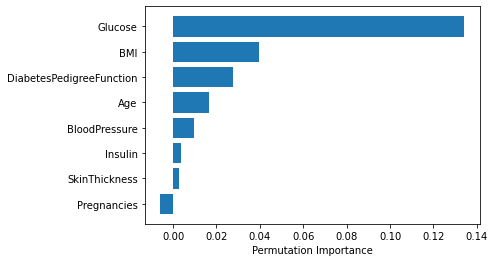

In [40]:
# Feature importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svm_clf, X_trans_test, y_test)
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# Glucose and BMI are the top 2 most important freatures in predicting Diabetes

#### **Dimensional Reduction**  - Transforming X

In [41]:
# Dimension Reduction for plot
# reducing to 2 dimensions (transforming 7D to 2D)
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()

# Now apply the transformation to all the columns:
for col in diabetes.columns:
    diabetes[col] = encoder.fit_transform(diabetes[col])

scaler = StandardScaler()
X_features = diabetes.drop(columns=["Outcome"])
X_features = scaler.fit_transform(X_features)
pca = PCA()

pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

NameError: name 'PCA' is not defined

In [ ]:
pca2 = PCA(n_components=2)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1], c=diabetes['Outcome'])
plt.show()

#### **Neural Network** - Yang Hang

#### **Convert Y** to categorical

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.utils.np_utils import to_categorical

In [43]:
y_train_cate = to_categorical(y_train, num_classes=None)
y_test_cate = to_categorical(y_test, num_classes=None)

#### define a function to build the keras model

In [133]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001),
                    activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))

    model.add(Dense(2, activation='sigmoid'))
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model


nn_model = create_model()
print(nn_model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 32)                288       
                                                                 
 dense_60 (Dense)            (None, 16)                528       
                                                                 
 dense_61 (Dense)            (None, 4)                 68        
                                                                 
 dense_62 (Dense)            (None, 2)                 10        
                                                                 
Total params: 894
Trainable params: 894
Non-trainable params: 0
_________________________________________________________________
None


#### fit the model to the training data

In [134]:
history = nn_model.fit(X_trans_train, y_train_cate, validation_data=(X_trans_test, y_test_cate),epochs=100, batch_size=10)

Epoch 1/100
54/54 [==============================] - 1s 5ms/step - loss: 0.6879 - accuracy: 0.6369 - val_loss: 0.6815 - val_accuracy: 0.6494
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6518 - val_loss: 0.6688 - val_accuracy: 0.6494
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.6518 - val_loss: 0.6602 - val_accuracy: 0.6494
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6518 - val_loss: 0.6552 - val_accuracy: 0.6494
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6518 - val_loss: 0.6526 - val_accuracy: 0.6494
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.6518 - val_loss: 0.6507 - val_accuracy: 0.6494
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6518 - val_loss: 0.6487 - val_accuracy: 0.6494
Epoch 8/100
5

Epoch 59/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7579 - val_loss: 0.5067 - val_accuracy: 0.8052
Epoch 60/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.7765 - val_loss: 0.5087 - val_accuracy: 0.7749
Epoch 61/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7709 - val_loss: 0.5033 - val_accuracy: 0.7922
Epoch 62/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7709 - val_loss: 0.5031 - val_accuracy: 0.7922
Epoch 63/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7728 - val_loss: 0.5026 - val_accuracy: 0.7965
Epoch 64/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.7765 - val_loss: 0.5010 - val_accuracy: 0.8009
Epoch 65/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.7765 - val_loss: 0.5003 - val_accuracy: 0.7965
Epoch 

#### Model accuracy

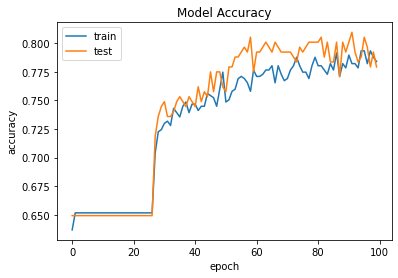

In [135]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#### Model Losss

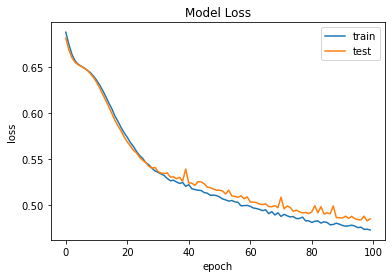

In [136]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()